In [27]:
# import data
data <- read.csv('/Users/alessia/Desktop/economic_freedom/data.transformed.csv')
# only select numeric variables
num.data <- data[c(4:16)]

We perform a hierarchical cluster analysis to group variables, through agglomerative and divisive analysis. We expect the variables Tax Burden, Government Spending and Fiscal Health to be grouped separately from other variables. However, we're also curious about whether the indicators for each topic (rule of law, government size, regulatory efficiency and market openness are grouped together).

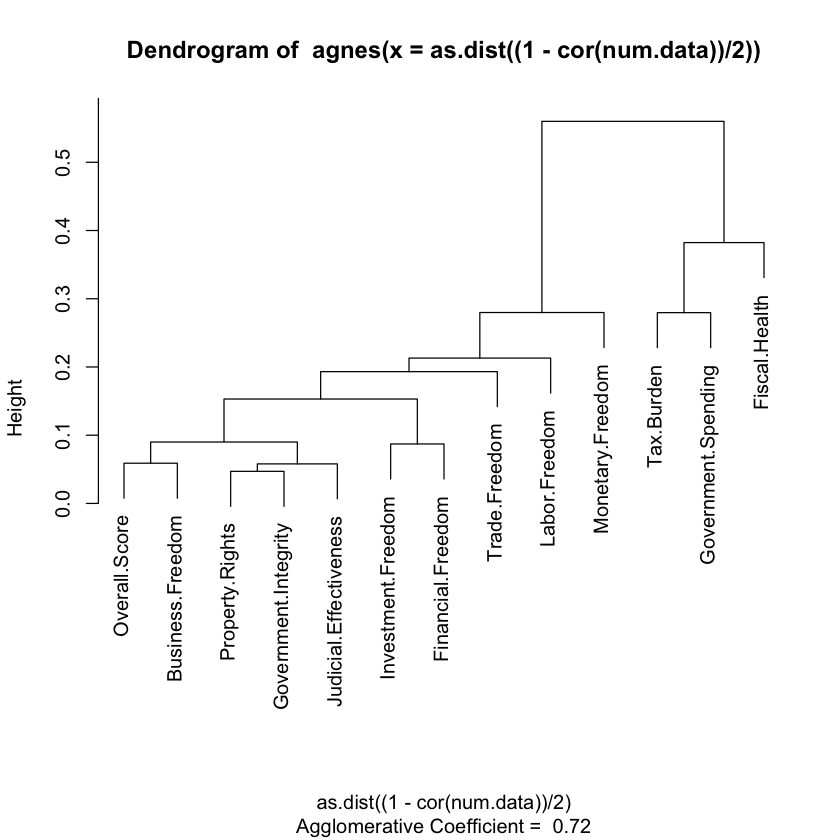

For k = 2 , average silhouette score of agglomerative analysis is 0.6956774 


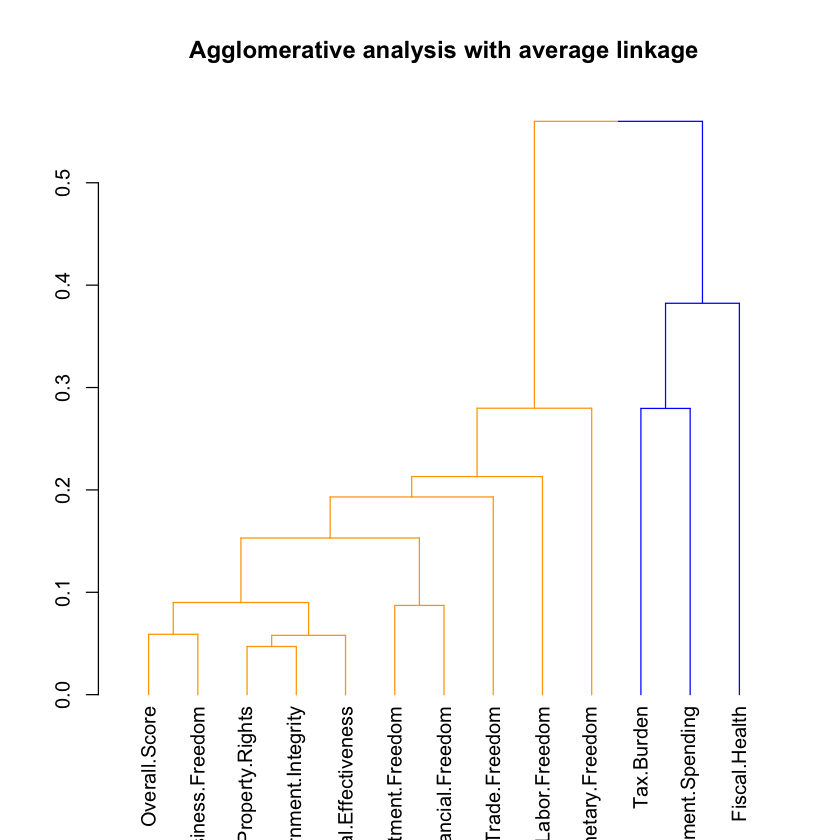

In [75]:
# Hierarchical cluster analysis on variables

# agglomerative nesting with average linkage
X.agnes.var <- agnes(as.dist((1-cor(num.data))/2))
plot(X.agnes.var,which.plots=2)
X.agnes.avg.2 <- cutree(X.agnes.var,k=2)
colors <- c('orange', 'blue')
X.agnes.avg.var <- as.dendrogram(X.agnes.var)
X.agnes.color.var <- color_branches(X.agnes.avg.var, k = 2, col = colors)
plot(X.agnes.color.var, main = 'Agglomerative analysis with average linkage')
silhouette_values <- silhouette(X.agnes.avg.2, dist(1-cor(num.data)))
cat("For k =", 2, ", average silhouette score of agglomerative analysis is", mean(silhouette_values[, "sil_width"]), "\n")

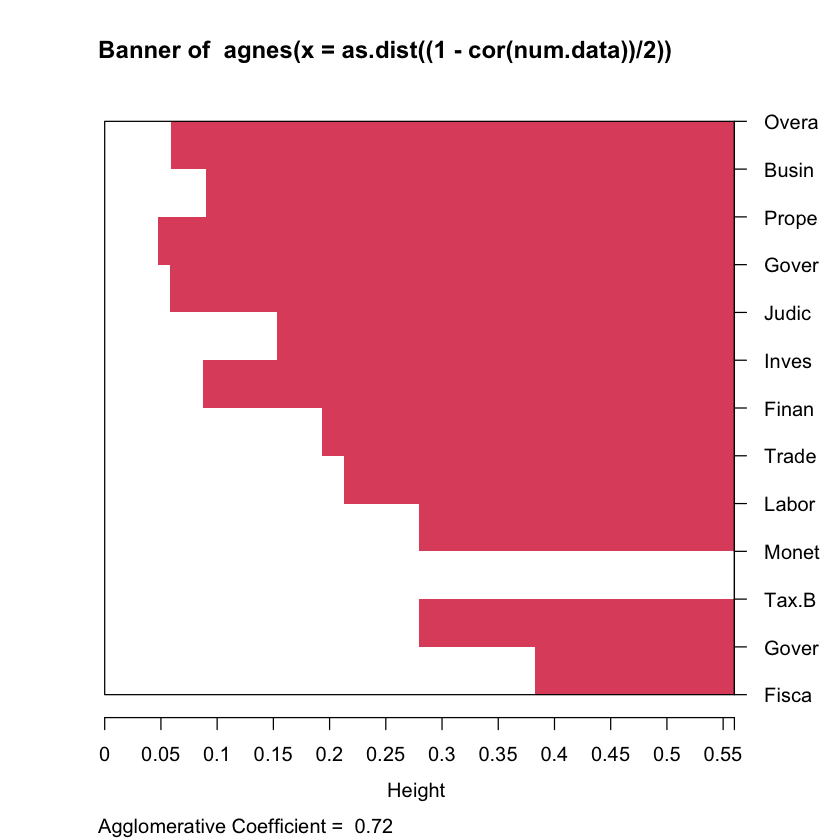

In [76]:
# banner plot for agglomerative analysis with average linkage on variables
plot(X.agnes.var, which.plots = 1)

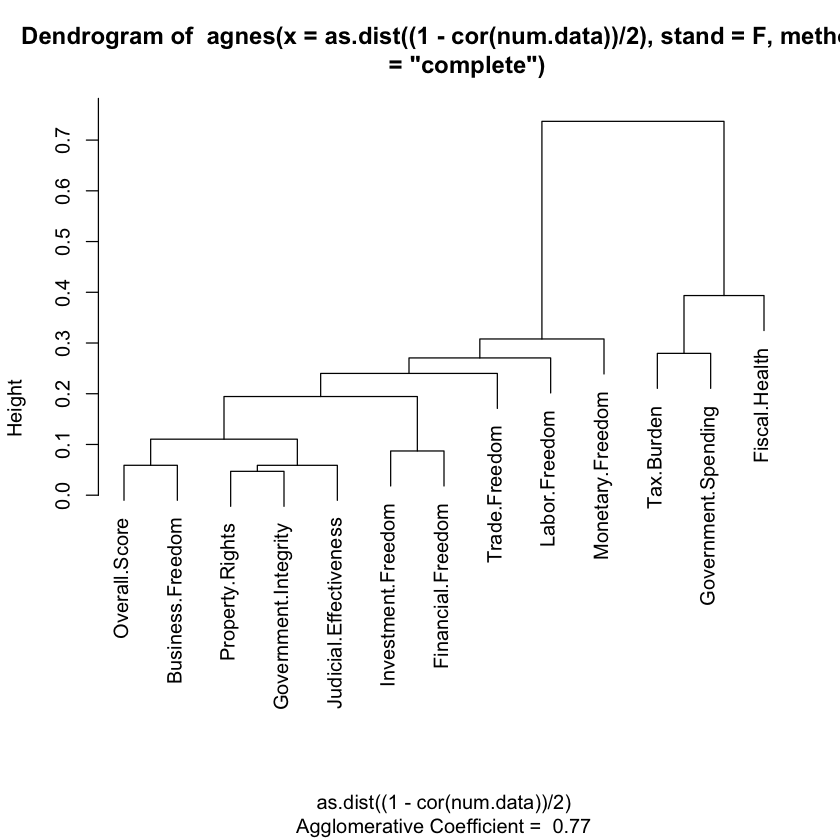

For k = 2 , average silhouette score of agglomerative analysis is 0.6956774 


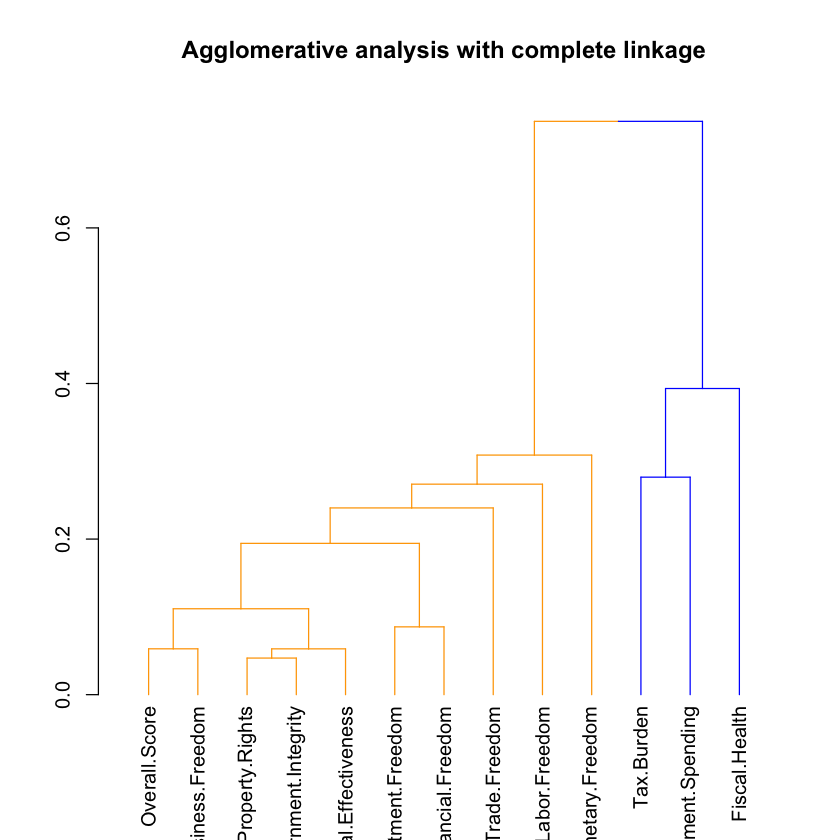

In [77]:
# complete linkage
set.seed(123)
X.agnes.var.complete<- agnes(as.dist((1-cor(num.data))/2),method="complete", stand = F)
plot(X.agnes.var.complete,which.plots=2)
# best partition comes from complete linkage
X.agnes.comp.2 <- cutree(X.agnes.var.complete,k=2)
colors <- c('orange', 'blue')
X.agnes.dg.var <- as.dendrogram(X.agnes.var.complete)
X.agnes.color.var <- color_branches(X.agnes.dg.var, k = 2, col = colors)
plot(X.agnes.color.var, main = 'Agglomerative analysis with complete linkage')
silhouette_values <- silhouette(X.agnes.comp.2, dist(1-cor(num.data)))
cat("For k =", 2, ", average silhouette score of agglomerative analysis is", mean(silhouette_values[, "sil_width"]), "\n")

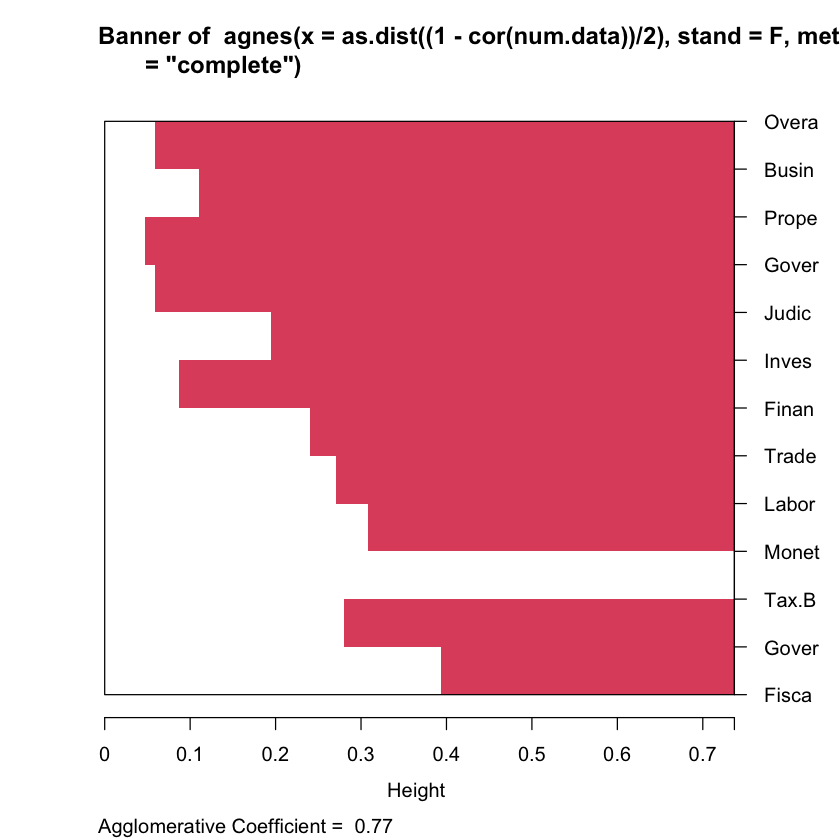

In [78]:
# banner plot for agglomerative analysis with complete linkage on variables
plot(X.agnes.var.complete, which.plots = 1)

Agglomerative analysis with complete linkage and with average linkage tends to group variables in the same way, setting Tax Burden, Government Spending and Fiscal Health apart from other variables. This was already visible in the correlation matrix in the data visualization part, where all three variables were found not to be correlated or to be slightly inversely correlated to the others.
Furthermore, we can observe that the rule of law indicators (government integrity, property rights and judicial effectiveness) are found to be very similar to each other. Investment freedom and financial freedom are also found to be similar among them, and therefore are grouped together, whereas trade freedom, although close by, is found to be more dissimilar, for what concerns market openness indicators.

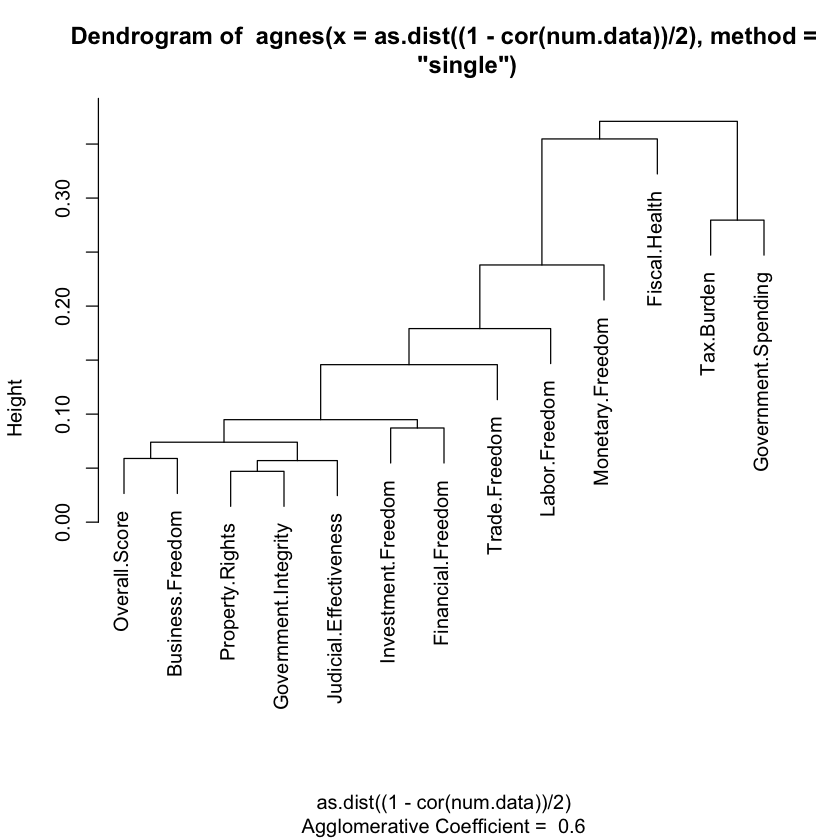

In [80]:
# single linkage
X.agnes.var.single<- agnes(as.dist((1-cor(num.data))/2),method="single")
plot(X.agnes.var.single,which.plots=2)

Agglomerative analysis with single linkage also groups variables in a similar way to the previous methods, except for the fact that it assigns Fiscal Health to the same group of most other predictors and just creates a separate group for the variables Tax Burden and Government Spending. However, Fiscal Health is the most dissimilar from all the other variables in its group. 

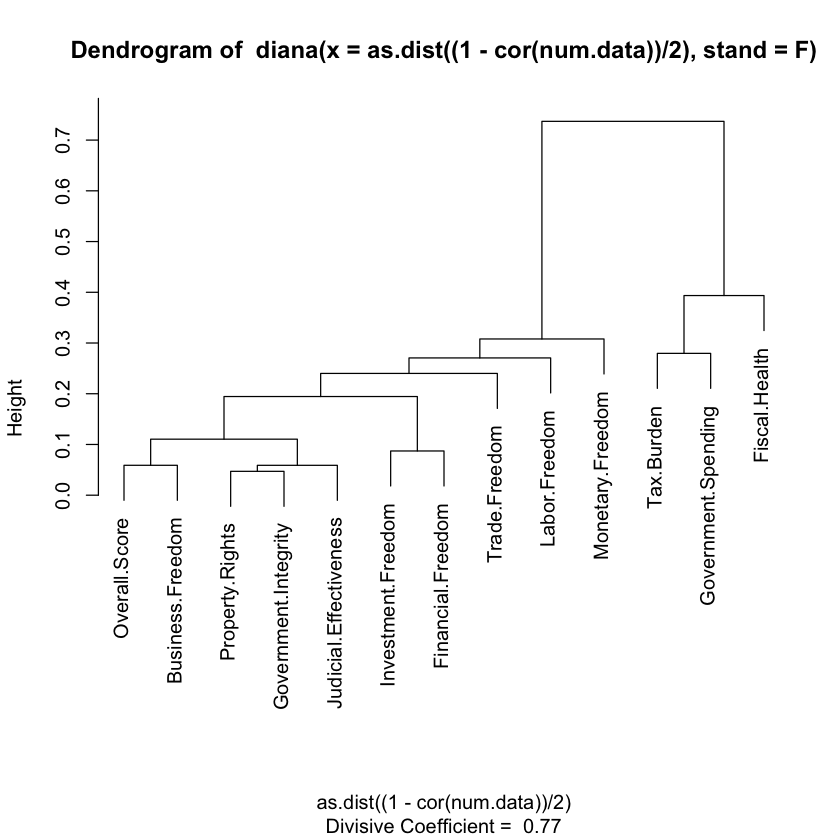

For k = 2 , average silhouette score of divisive analysis is 0.6956774 


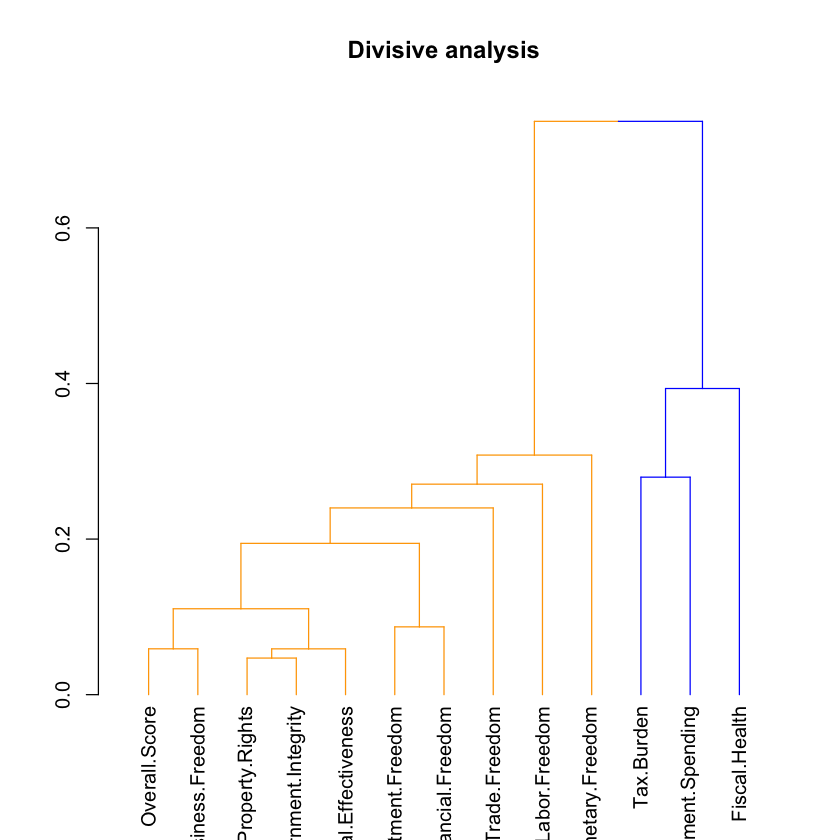

In [81]:
# divisive analysis
set.seed(123)
X.diana.var <- diana(as.dist((1-cor(num.data))/2), stand = F)
plot(X.diana.var,which.plots=2)
X.diana.var.2 <- cutree(X.diana.var,k=2)
colors <- c('orange', 'blue')
X.diana.dg.var <- as.dendrogram(X.diana.var)
X.diana.color.var <- color_branches(X.diana.dg.var, k = 2, col = colors)
plot(X.diana.color.var, main = 'Divisive analysis')
silhouette_values <- silhouette(X.diana.var.2, dist(1-cor(num.data)))
cat("For k =", 2, ", average silhouette score of divisive analysis is", mean(silhouette_values[, "sil_width"]), "\n")

Divisive analysis groups variables in accordance with agglomerative analysis with complete and average linkage, once again setting Tax Burden, Government Spending and Fiscal Health apart from other variables.

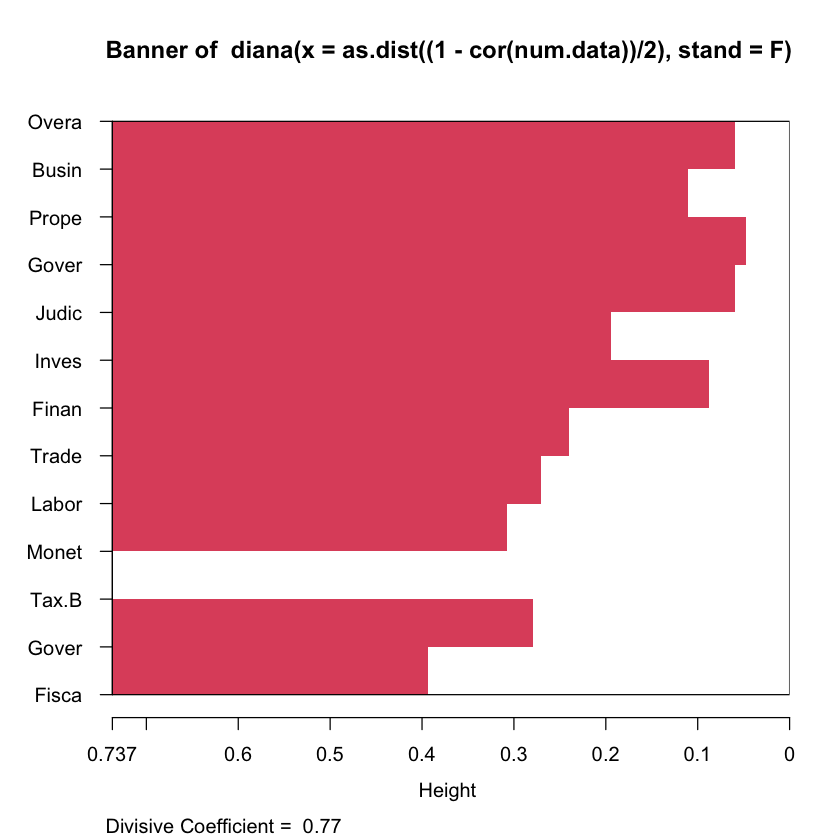

In [82]:
# banner plot for divisive analysis
plot(X.diana.var, which.plots = 1)